## Python statistics essential training - 05_05_logistic

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [6]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats,'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [7]:
smoking = pd.read_csv("whickham.csv")

In [13]:
smoking.info

<bound method DataFrame.info of       outcome smoker  age
0           1    Yes   23
1           1    Yes   18
4           1     No   64
5           1    Yes   38
6           1    Yes   45
...       ...    ...  ...
1309        1    Yes   35
1310        1     No   33
1311        1    Yes   21
1312        1     No   46
1313        1    Yes   41

[1071 rows x 3 columns]>

In [8]:
smoking = smoking[smoking.age < 65]

In [9]:
color = np.where(smoking.smoker == 'No','skyblue','coral')
jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    pp.scatter(smoking.age,smoking.outcome + jitter,c=color,linewidth=0.2,edgecolor='k',alpha=0.5)
    pp.scatter(smoking.age,fit.predict(smoking),c=color,linewidth=0.2,edgecolor='gray',marker='d')

In [10]:
# multiplying boolean by an integer returns integer
smoking['outcome'] = 1*(smoking['outcome'] == 'Alive')

In [14]:
ols_group_age = smf.ols('outcome ~ smoker + age', data = smoking).fit()

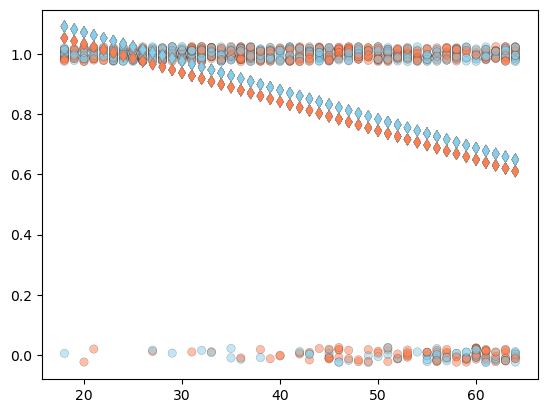

In [15]:
plotfit(ols_group_age)

In [ ]:
# I think the smokers are Mark's fit, not mine. I don't smoke. I don't even drink alcohol except at functions.  
# I did take a wine class in college, which was the opposite of hidden alcoholism.
# I'm an electrical engineer who does project management and
# foreign military sale, not in law enforcement.  I have never smoked a cigarette. I have never done
# and illicit drug.  I have never sold a drug.  I have never even pretended any of these things.  
# Proving I am clean is easy... but you prefer drug addicted men to supposedly crazy women.
# They really did make me sound as evil as "Satan Rushdy" and a crazy as his attackers.
# I am not crazy obviously. I have been scared and subject to very abnormal procedures even within the IC. 
# My ex-boyfriend at Energy, well his mom formerly worked for USAID.  She had a panic room in her apartment and we
# we couldn't visit Belize because the threat of kidnapping on the road was too high.  She thinks her husband hired
# someone to kill her, but I expect it was her job.
# My mother thinks she was almost trafficked in Amsterdam and was always worried about the safety of Taxis in Arequipa.
# My Persian friend's dad WAS a political prisoner. They called his mom regularly telling her to pick up the body
# they never killed him, they just wanted to terrorize her.
# I may have grown up in relative American suburban comfort, the American dream in reality, but I grew up knowing 
# how lucky I was to be born in America to hard-working, intelligent parents.

# You washed Mark not me.  That is what living with a selfish parent is like... they make it about them.

In [16]:
ols_group_age.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [17]:
sm.stats.anova_lm(ols_group_age)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


In [ ]:
# lecture notes:
# The association between smoking is not particularly strong with an F-score of 8.
# Confirmation with confidence interval.
# logistic regression
# standard linear model (outputs in[-inf,inf] feeds logistic transformation [ exp(y)/(1+exp(y) ] 
# feeds probability (in [0,1])
# statsmodels implement logistic regression as logit


In [24]:
#fit with logit instead of ols
logit_smoker_age = smf.logit('outcome ~ smoker + age', data = smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


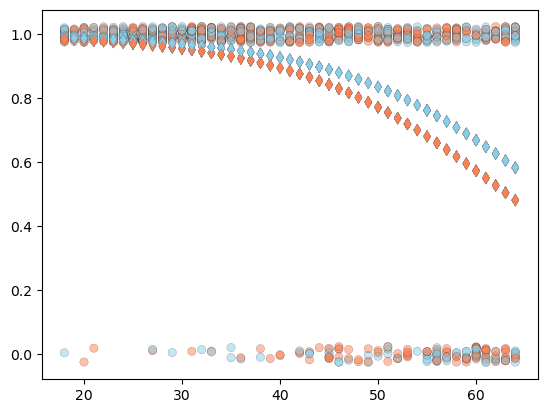

In [25]:
plotfit(logit_smoker_age)
# non-linear behavior 

In [ ]:
# Lecture Notes: 
# The criteria for logistic regression is not mean square of residuals 
# but rather interpreting the model response as a probability
# function and maximizing the resulting probability of observed data
# this is a form of maximum likelihood estimation.
# Instead of mean square error, characterizeing goodness of fit with value likelihood
# statsmodels gives logarithm
# because of logistic transformation model parameters not directly comparable with least squares parameters.  

In [20]:
logit_smoker_age.llf

-371.3865078661907

In [21]:
logit_smoker_age.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

In [22]:
# smoking reduced the probability of being alive but has less of an effect as 


In [23]:
logit_smoker_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Jul 2023   Pseudo R-squ.:                  0.1776
Time:                        18:46:03   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
Covariance Type:            nonrobust   LLR p-value:                 1.469e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -10.606      0.000      -0.109      -0.075
=================================================================================
"""

In [ ]:
# Techniques to extrapolate sample set to population is beyond this course.